<h1>LABORATORIO 3</h1>

<h3>Procesando	Texto	y	usando	scikit-learn</h3>

<p><b>1 Procesamiento	de	texto	básico	con	SciKit-learn</b></p>

SciKit-learn	es	una	biblioteca	de	Python	de	código	abierto	para	el	aprendizaje	de	
máquinas que	viene	con	instalaciones	básicas	para	el	procesamiento	de	texto	para	
apoyar	el	agrupamiento	y	clasificación	- incluyendo	tokenización,	conteo	de	
palabras,	y	steamming	(obtener	la	forma	raíz	de	las	palabras).	
En	este lab	práctico	vamos	a	revisar	brevemente	cómo	utilizar	SciKit-learn	en	
Python		y	luego	observar	con	más	detalle	en	las	instalaciones	de	procesamiento	
previo.

<p><b>2.1</b>	El	uso	de	SciKit-learn
[Esta	sección	puede	ser	omitido	por	aquellos	de	ustedes	que	ya	están	familiarizados	con	
la	biblioteca]
Los	sitios	web	asociados	con	scikit-learn	son
http://scikit-learn.org/
(Sitio	en	general,	documentación	y	
tutoriales,	y	más)	y
https://github.com/scikit-learn/scikitlearn
    
Descarga/instala	la	biblioteca	activando	tu	entorno	Conda	y	luego:

conda install -c anaconda scikit-learn

Después	de	que	empezó	inactivo	o	lo	que	sea	la	interfaz	que	prefiera	
(ipython,	etc),	haga	lo	siguiente	para	cargar	scikit-learn	y	numpy en	Python,	
(>>>	es	el	símbolo	del	reposo):</p>

In [5]:
import sklearn
import numpy as np   

Otro	aspecto	importante	del	paquete	es	que	interactúa	bien	con	paquetes	de	
visualización	como	pyplot,	que	se	debe	cargar:

conda install matplotlib

Ahora	desde python:

In [1]:
import matplotlib.pyplot as plt

A	continuación,	debe	crear	algunos	datos	para	visualizar	– ej.,	una	matriz	
bidimensional	que	representa	una	función:

In [6]:
data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])

x = data[:,0]

y= data[:,1]

Ahora	puede	visualizar	la	función	de	la	siguiente	manera:

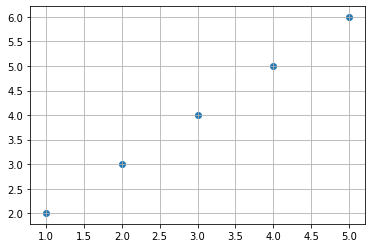

In [10]:
plt.scatter(x,y)
plt.grid(True)
plt.show()

<p><b>2.2</b> Preprocesamiento	de	Texto	con	SciKit-learn
Muchas	de	las	aplicaciones	de	análisis	de	texto	que	vamos	a	considerar	requerir	
tomar	un	texto	(por	ejemplo,	un	post),	tokenizar,	y	utilizando	los	tokens	como	
features,	posiblemente	después	de	la	eliminación	de	palabras	con	lematización	/	
stops	words.	Con	SciKit-learn	no	necesitamos	escribir	código	para	hacer	eso;	
podemos	utilizar	la	clase	CountVectorizer	en	su	lugar.	Una	instancia	de	la	clase	
se	crea	de	la	siguiente	manera:</p>

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer(min_df=1)

Una	vez	que	hemos	creado	la	instancia,	podemos	utilizarlo	para	extraer	una	bolsa	de	palabras
la	representación	de	una	colección	de	documentos	utilizando	el	método	scikit-learn
fit_transform.	En	este	primer	ejemplo	de	prueba,	usamos	una	lista	de	cadenas	como	
documentos,	de	la	siguiente	manera:

In [14]:
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)

fit_transform ha	extraído	siete	características	de	los	dos	“documentos”; podemos	ver	eso	con	el	método	get_feature_names().

In [16]:
 vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

Se	puede	ver	cuántas	veces	cada	una	de	estas	siete	features se	produce	en	los	dos	documentos	haciendo:

In [18]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

Tenga	en	cuenta	que	esta	llamada	devuelve	una	matriz	de	dos	filas,	una	por	
"documentos".	Cada	fila	de	siete	elementos.	Cada	elemento	especifica	el	número	
de	elementos	de	una	determinada	feature	se	produjo	en	ese	documento.	
Entonces:

In [19]:
X.toarray()[0]

array([1, 1, 1, 1, 1, 0, 1], dtype=int64)

nos	da	el	vector	solo	para	el	primer	documento	(“How to format my hard disk"),
que	contiene	todas	las	palabras	elegidas	como	las	funciones,	excepto	para	los	
'problemas'.	En	tanto:

In [22]:
X.toarray()[1,2]

1

nos	da	el	número	de	veces	que	la	palabra	‘hard’ que	ocurre	en	el	segundo	documento.
CountVectorizer	tiene	una	serie	de	opciones	muy	útiles,	que	se	detallan	en	la	página:
http://scikitlearn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.ht
ml

<p><b>Veamos	ahora	cómo	funciona	esto	con	una	verdadera	colección	de	documentos.</b>	
Vamos	a	utilizar	los	datos	del	dataset	‘20	Newsgroups’,	que	es	una	colección	de	
alrededor	de	20.000	documentos	procedentes	de	20	grupos	de	noticias	diferentes,	que	
se	utiliza	comúnmente	en	experimentos	de	clasificación	de	texto	y	la	agrupación	de	
texto.	
El	set	de	datos	se	puede	encontrar	en:
http://qwone.com/~jason/20Newsgroups/
Pero	ya	está	incluido	en	scikit-learn	y	se	puede	cargar	en	Python	haciendo:</p>

In [23]:
from sklearn.datasets import fetch_20newsgroups

Para	acelerar	las	cosas,	en	el	resto	del	laboratorio	sólo	utilizaremos	un	subconjunto	
de	los	documentos,	los	que	pertenecen	a	las	siguientes	4	categorías:

In [24]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics',
'sci.med']

Podemos	importar	los	documentos	pertenecientes	a	las	categorías	de	la	siguiente	
manera:


In [25]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)

(La	primera	vez	que	se	hace	esto,	se	va	a	tomar	un	tiempo,	no	te preocupes.	También	es	posible	que	puedas	recibir	un mensaje	de	alerta	acerca	de	no	encontrar	los	controladores,	ignoralo)	
Los	archivos	han	sido	cargados	en	el	atributo	‘data’	del	objeto	twenty_train

Vamos	ahora	a	crear	un	nuevo	objeto	CountVectorizer:

In [26]:
vectorizer = CountVectorizer()

Una	vez	más,	la función fit_transform	se	puede	utilizar	para	tokenizar	cada	documento,	identificar	las	palabras	más	relevantes,	construir	un	diccionario	de	tales	palabras,	y	crear	para	cada	documento	una	representación	vectorial	en	el	que	las	palabras	son	las	features y	el	valor	de	estas	características	es	el	número	de	ocurrencias de	cada	palabra	en	un	documento.

Al	igual	que	en	el	ejemplo	de	prueba	anterior:

In [27]:
train_counts = vectorizer.fit_transform(twenty_train.data)

Por	ejemplo,	si	ahora	queremos	ver	la	frecuencia	de la	palabra	'algorithm'	se	produce	en	el	subconjunto	de	la colección	20 Newgroups	estamos	considerando	la	siguiente	manera:

In [28]:
vectorizer.vocabulary_.get('algorithm')

4690

Qué	frecuencia	es	la	que	obtuviste?

RTA: 4690

Para	ver	cuántos	términos	fueron	extraídos,	podemos	utilizar	get_feature_names	()
que	hemos	visto	anteriormente:

In [29]:
len(vectorizer.get_feature_names())

35788

La	clase	CountVectorizer		de	SciKit-learn	 puede	hacer	más	procesamiento	previo	de	una	colección	de	documentos	que	simples tokenizaciones.	
Una	importante	etapa	de	preprocesamiento	adicional	de	que	la	clase	puede	llevar	a	cabo	es	la	eliminacióde	stop	words.	
Esto	se	puede	hacer	mediante	la	especificación	de	un	parámetros	de	CountVectorizer, como	sigue:


In [32]:
vectorizer = CountVectorizer (stop_words = 'english')

(Pista:	si	ponen	‘spanish’	considerará	las	stop	words o	palabras	más	comunes	y	puntuaciones	del	español,	yasí	con	otros	idiomas)

Para	ver	qué	palabras	son	palabras	stop	words,	hace	lo	siguiente:

In [33]:
sorted(vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

Para	hacer	steamming	(tener	la	palabra	raíz)	y un pre-procesamiento	más	avanzado,	necesitamos	complementar	SciKit-learn	con	otra	biblioteca	de	python,	NLTK.	

<p><b>3.</b>	Pre-procesamiento	más	avanzado	con	NLTK

NLTK	es	una	biblioteca	de	Python	de	código	abierto que	ya	usamos	en	los	Labs	 anteriores disponible	en:
http://www.nltk.org.

NLKT	es	compatible	con	la	mayoría	de	los	tipos	de	procesamiento previo,	desde	POS	tagging	para	fragmentar,	para Inglés. También	viene	con	varios	recursos	útiles	como	corpus	y	el	léxico.

NLTK	se	describe	en	detalle	en	un	libro	de	Bird,	Klein	y	Loper	disponible	en	línea:
http://www.nltk.org/book/ la	versión	para	Python	3.

NLTK	es	una	biblioteca	enorme,	mucho	más	grande	que	SciKit-learn	de	hecho,	ya	que	contiene	también	su	propia
implementación	de	muchos	algoritmos	de	aprendizaje	automático.	

Cómo	aclaramos	en	clase,	sólo	vamos	a	tratar	acá	en	este	curso	de	sus	
funcionalidades.

</p>

In [34]:
import nltk

El	steamming	en	 NLTK incluye	implementaciones	de	varios algoritmosmuy	conocidos y	utilizados, incluyendo	el	Porter	Stemmer	y	el	LancasterStemmer.	(Ver http://www.nltk.org/howto/stem.html para	una	introducción	general	y http://www.nltk.org/api/nltk.stem.html		para	más	detalles,	incluyendo	los	idiomas	cubiertos)

Para	crear	un steammer	de	Inglés		tiene	que	hacer	lo siguiente:

In [35]:
 s = nltk.stem.SnowballStemmer('english')

Después	de	crear	el	steammer,	a	continuación,	puede	utilizarlo	para	llevar	a	la	raíz	(steam) palabras de	la	siguiente	manera:

In [36]:
s.stem("cats")

'cat'

In [37]:
s.stem("loving")

'love'

Otros	tipos	de	pre-procesamiento	de	NLTK	incluye	implementaciones	de	muchos	de	los	módulos	de	procesamiento previo	y	analizadores	sintácticos	que	discutimos	o	discutiremos	en	las clases:
- identificadores	de	idioma
- tokenizers	para	varios	idiomas
- divisores	de	oraciones
- POS	taggers
- Chunkers
- Parsers

Además,	NLTK	incluye	implementaciones	de	los	aspectos	del	análisis	de	texto	
que	vamos	a	discutir	en	este	módulo,	incluyendo
- NER	(Named	Entity	Recognition)
- Análisis	de	los	sentimientos
- Extraer	información	de	los	medios	de	redes sociales.
Por	ejemplo,	las	instrucciones	siguientes	(	puede	que	tengas que	descargar	el	paquete	 NLTK	'punkt'	para	hacer	esto)

Por	ejemplo,	las	instrucciones	siguientes	(	puede	que	tengas que	descargar	el	paquete	 NLTK	'punkt'	para	hacer	esto)

In [45]:
from nltk.tokenize import word_tokenize

# nltk.download('punkt') #if not used nltk.download()

text = word_tokenize("And now for something completely different")


producir	una	versión	tokenizada	de	la	frase,	que	luego	puede	ser	alimentado	en	el	etiquetador	POS	(	puede	que tenga	que	descargar	el	paquete	'	maxent_...'	para	hacer	esto)

In [44]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_treebank_pos_tagger')
# nltk.pos_tag(text)


<p><b>4.	La	integración	el	steammer	de	NLTK	con	el	CountVectorizer	de	SciKit-learn</b>

El	steammer	de	NLTK	puede	ser	utilizado	antes	de	la	alimentación	en	CountVectorizer	de SciKit-learn,	obteniendo	así	un	índice	más	compacto.	

Una	forma	de	hacer	esto	es	definir	una	nueva	clase	StemmedCountVectorizerExtendiendo	de CountVectorizer	y	redefiniendo	el	método	build_analyzer	() que	se	encarga	de	pre-procesamiento	y	tokenización:
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

build_analyzer()	toma	un	string	como	entrada	y	como	salida	una	lista	de	tokens:


</p>

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

Si	 modificamos	build_analyzer	()	para	aplicar		el	steammer	de	NLTK	a	la	salida	del	método	build_analyzer	(),	obtenemos	una	versión	que	deriva	así:

In [50]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc)) 

Ahora	Podemos	crear	una	instancia	de	nuestra	clase!	

In [51]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
stem_analyze = stem_vectorizer.build_analyzer()

como	se	puede	ver,	estos	nuevos	usos	Vectorizer	surgieron	versiones	de	fichas:

In [52]:
Y = stem_analyze("John bought carrots and potatoes")
for tok in Y: print(tok)

john
bought
carrot
potato


Si utilizamos este Vectorizer para extraer features para el subconjunto del 
dataset 20_Newsgroups que consideramos antes, vamos a tener un menor 
número de features:

In [54]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism','soc.religion.christian','comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True,random_state=42)

train_counts = stem_vectorizer.fit_transform(twenty_train.data) 

len(stem_vectorizer.get_feature_names())

26888

(Compará	este	número	con	los	alrededor	de	35.000	características	que	hemos	obtenido	
usando la versión sin hacer steam).



Subir a tu github una implementación personalizada de NLTK para CountVectorizer que haga steam y stopwords del idioma español y dos ejemplos de oraciones usando tu clase.

También importá un corpus como 20_Newsdataset pero que esté en español. Qué
corpus poner, queda a tu criterio! 